# Esercitazione 7

Elisa Stabilini - 942529

In [1]:
# importazione librerie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import warnings
import string
from scipy.optimize import curve_fit
warnings.filterwarnings('ignore')
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In questa esercitazione si simula nuovamente la dinamica di un sistema di 108 particelle di Argon all'equilibrio termodinamico nelle tre fasi solida, liquida e gassosa.

In [2]:
npart = 108

## Punto 1

Implementare la tail-correction per il calcolo dell'energia potenziale $U$ e della pressione $P$ nel codice di dinamica molecolare

## Punto 2

### Punto 2.1

Utilizzare quindi il codice Monte Carlo NTV per stampare i valori istantanei di energia potenziale per particella $U/N$ e pressione $P$ nelle seguenti condizioni termodinamiche:
* stato solido: $\rho^* = 1.1$, $T^*=0.8$ con raggio di cut off $r_{cut} = 2.2$
* stato liquido: $\rho^* = 0.8$, $T^*=1.1$ con raggio di cut off $r_{cut} = 2.5$
* stato gassoso: $\rho^* = 0.05$, $T^*=1.2$ con raggio di cut off $r_{cut} = 5.0$

A differenza dell'esercitazione 4 in cui il sistema è stato fatto evolvere utilizzando i metodi della dinamica molecolare, in questo caso viene utilizzato l'algoritmo di Metropolis.

Il problema di una simulazione che utilizza l'algoritmo di Metropolis è la correlazione tra gli stati consecutivi del sistema.

Per poter lavorare con dati non correlati suddivido in blocchi la simulazione per cui, i valori delle grandezze fisiche istantanee vengono utilizzati oer fare una media sull'intero blocco. Scegliendo in maniera opportuna la dimensione del blocco i dati risultano non correlati.

Di seguito sono riportati i valori istantanei di energia potenziale per particella e pressione per ciascuna delle tre fasi. È stata eseguita una simulazione di $5\times10^5$ passi per poter avere un numero sufficiente di dati su cui calcolare la funzione di autocorrelazione.

Il numero di step utilizzati per l'equilibrazione variano invece a seconda della fase del sistema, nel caso degli stati solido e liquido l'equilibrazione dura 3000 steo, nel caso gassoso invece sono stati fatti $3\times10^4$.

#### Solido

#### Equilibrazione

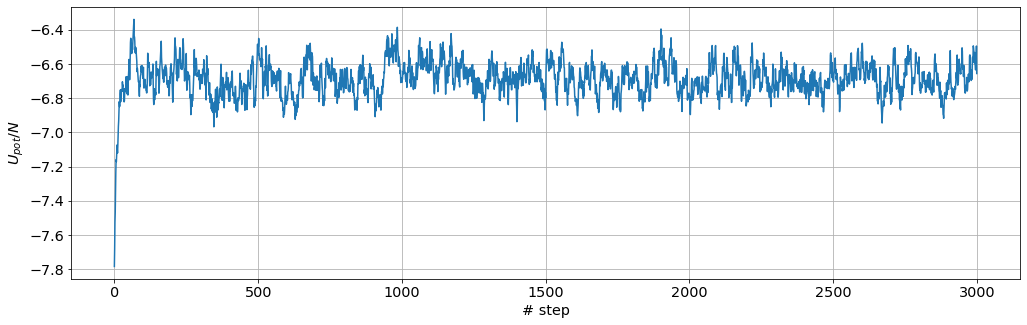

In [3]:
step, mediaSol = np.loadtxt("Solido/PreprintEqS.dat", usecols=(0,1), unpack='true')

plt.figure(figsize=(17,5))
plt.plot(step, mediaSol, label="Equilibrazione")
plt.xlabel('# step')
plt.ylabel(r'$U_{pot}/N$')
plt.grid(True)
plt.show()

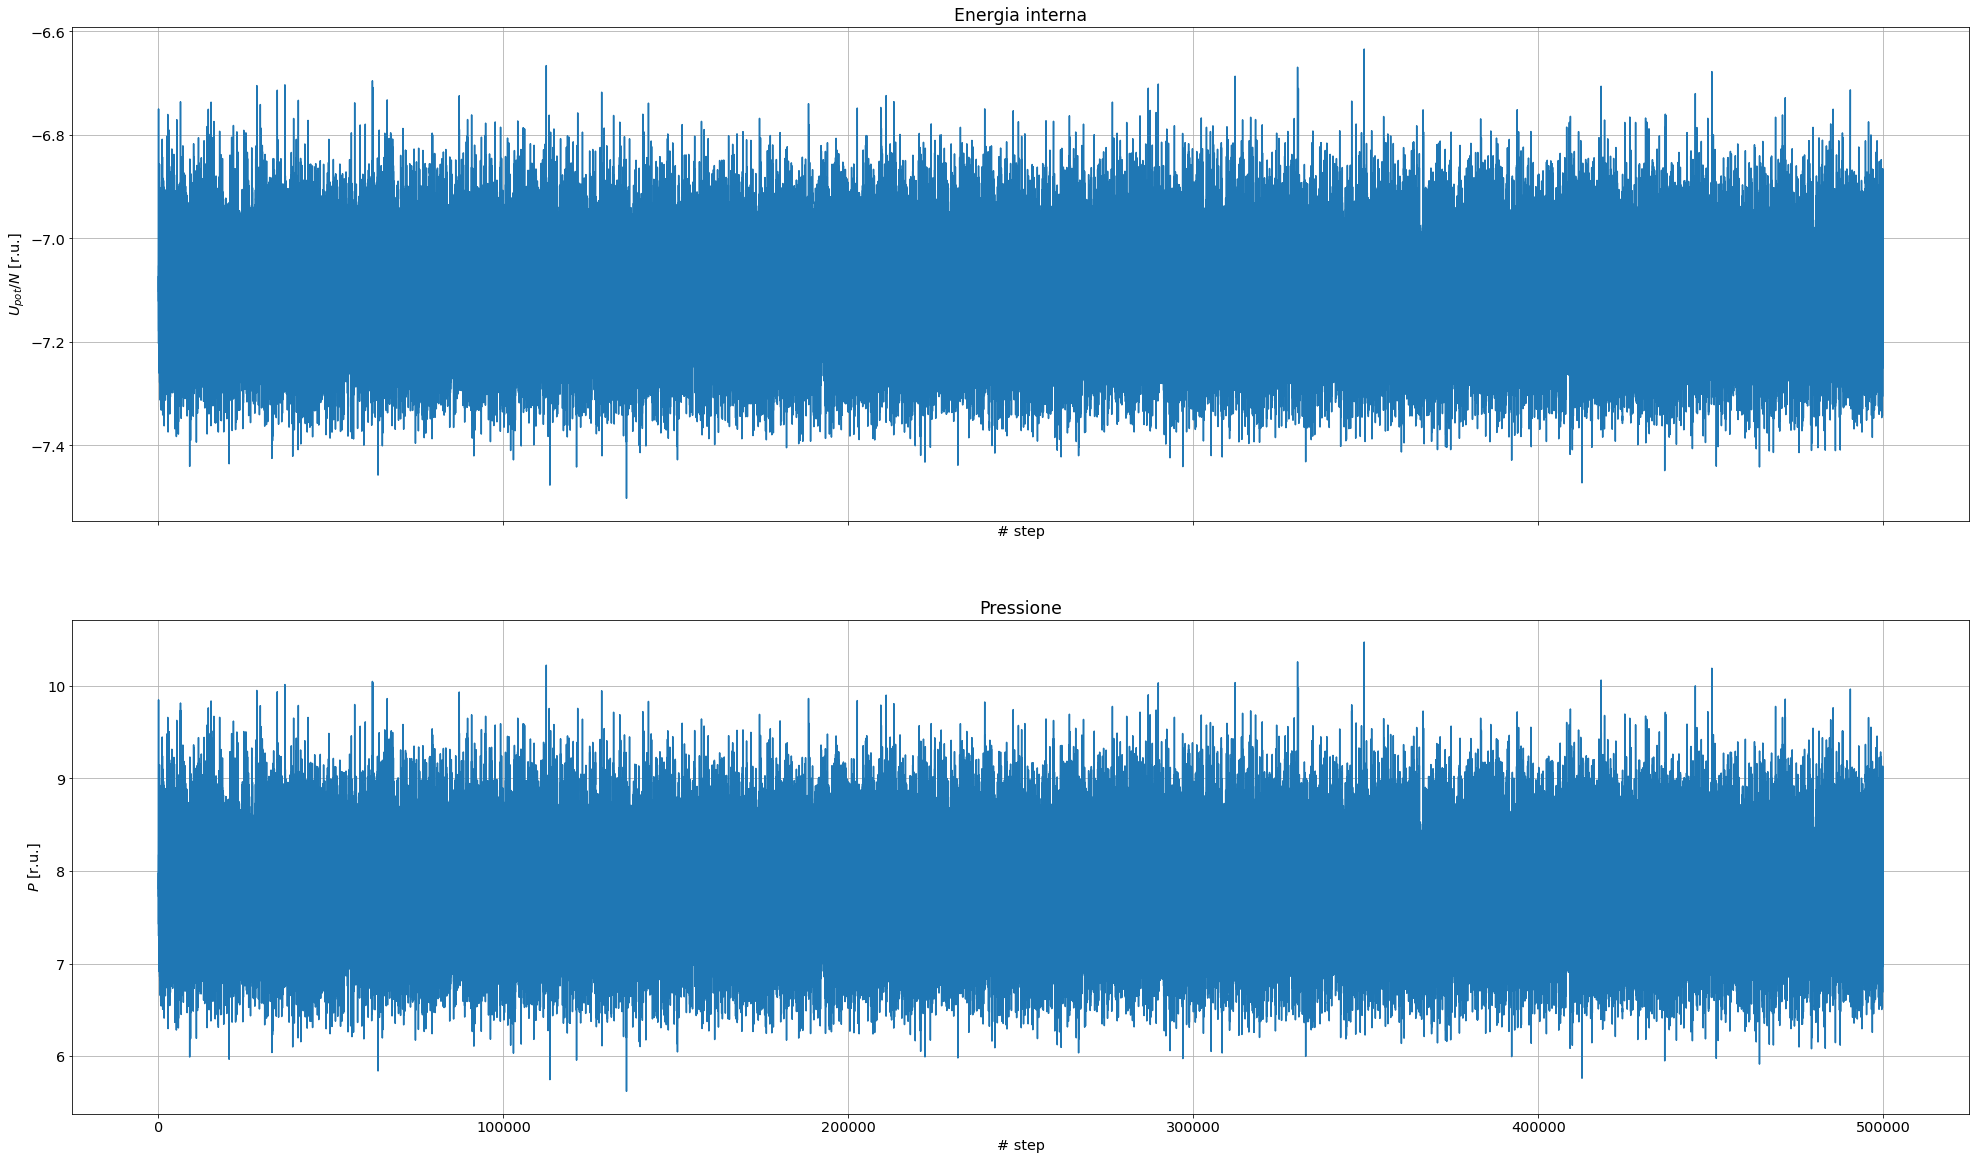

In [4]:
#Caricamento dati da file
step, USolid = np.loadtxt("Solido/USolid.dat", usecols=(0,1), unpack='true')
step, PSolid = np.loadtxt("Solido/PSolid.dat", usecols=(0,1), unpack='true')

#Preparazione plot

fig, axs = plt.subplots(2, 1, figsize=(34, 20), sharex=True, sharey=False,
                        tight_layout=False)

axs[0].plot(step, USolid)
axs[1].plot(step, PSolid)

axs[0].set(xlabel=r'# step', ylabel=r'$U_{pot}/N$ [r.u.]', title='Energia interna')
axs[1].set(xlabel=r'# step', ylabel=r'$P$ [r.u.]', title='Pressione')

axs[0].grid(True)
axs[1].grid(True)
plt.show()

#### Liquido

#### Equilibrazione

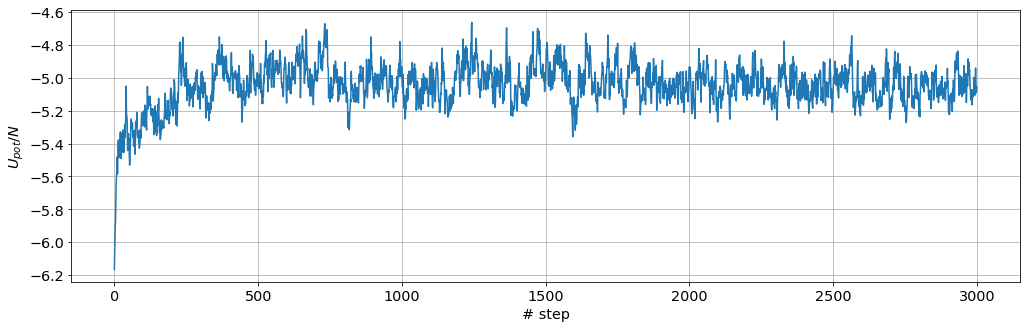

In [5]:
step, mediaLiq = np.loadtxt("Liquido/PreprintEqL.dat", usecols=(0,1), unpack='true')

plt.figure(figsize=(17,5))
plt.plot(step, mediaLiq, label="Equilibrazione")
plt.xlabel('# step')
plt.ylabel(r'$U_{pot}/N$')
plt.grid(True)
plt.show()

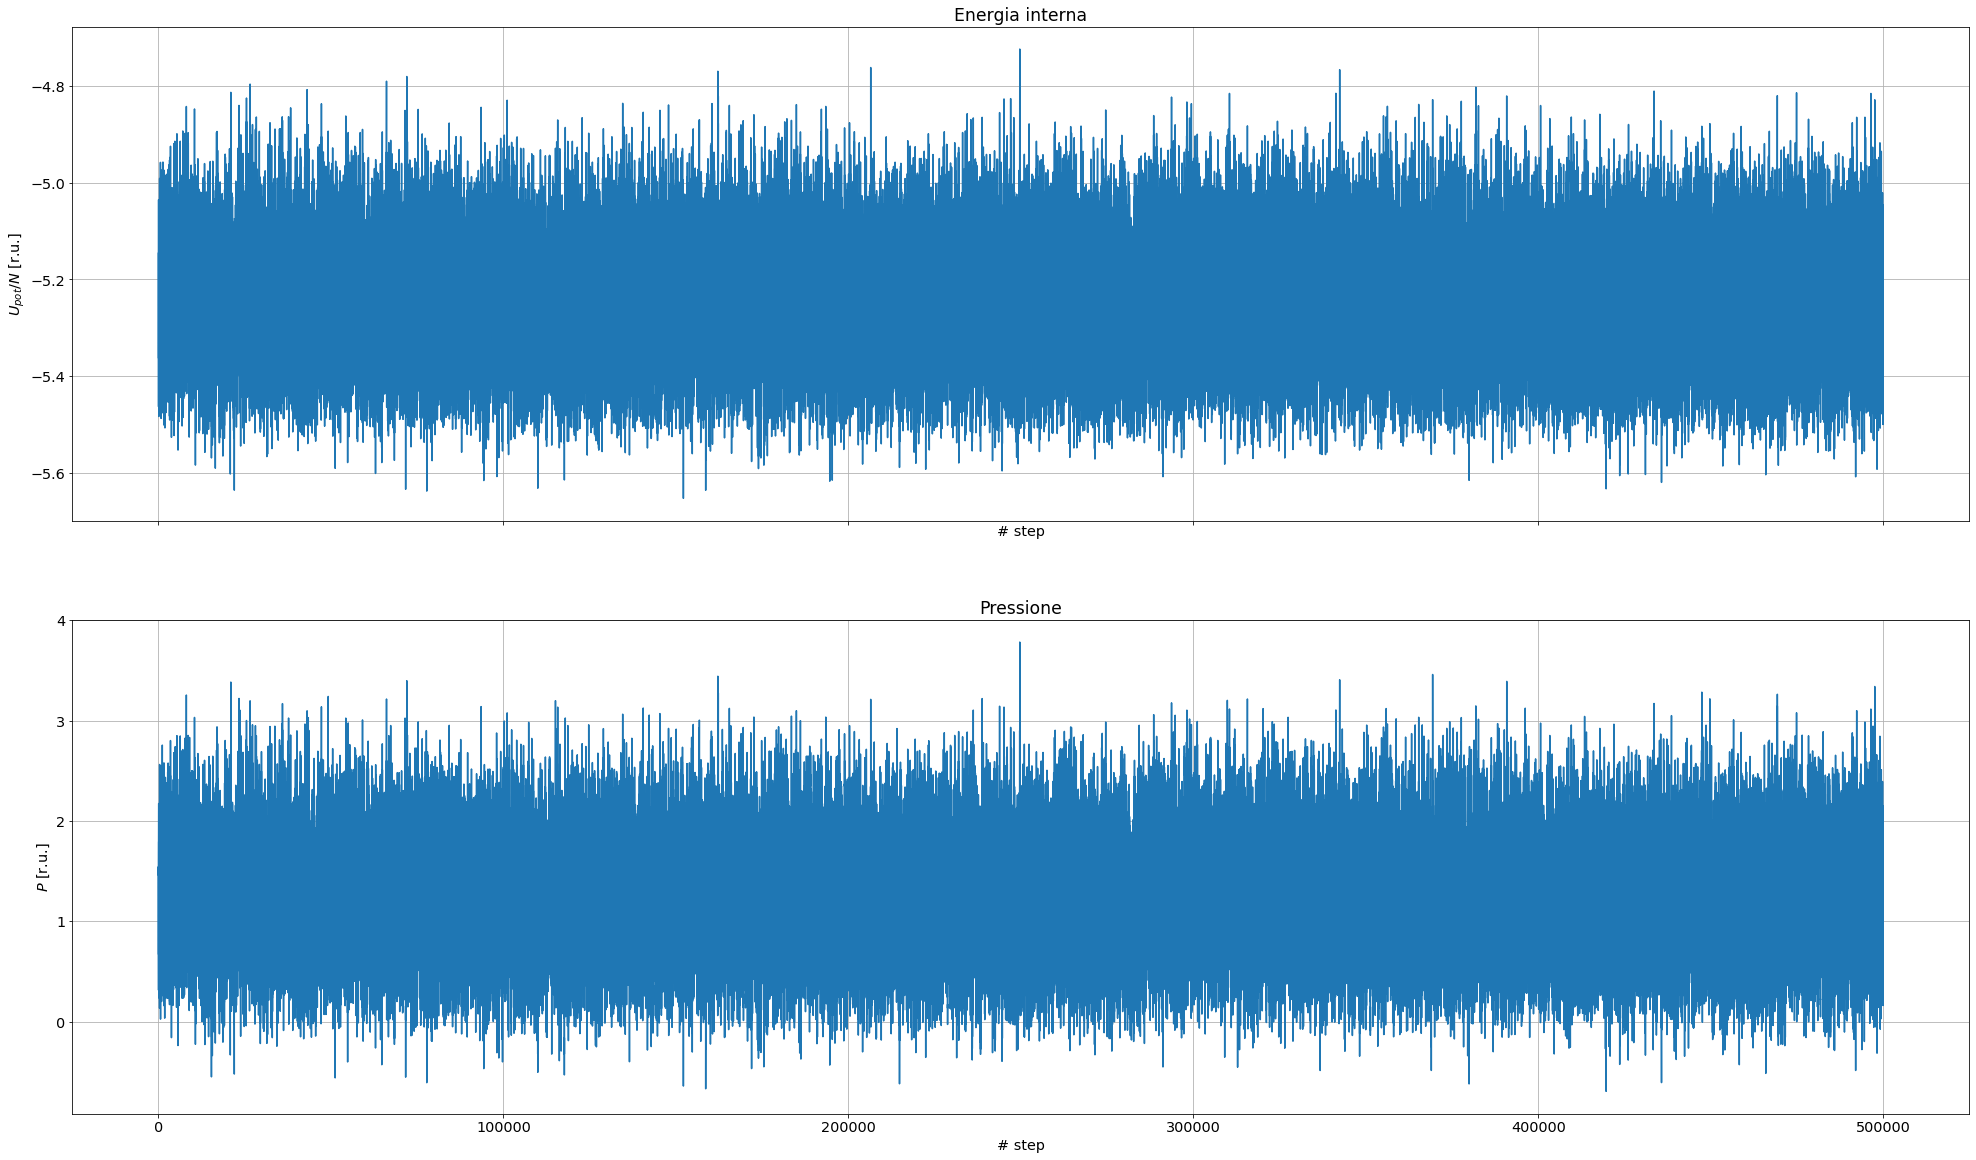

In [6]:
#Caricamento dati da file
step, ULiquid = np.loadtxt("Liquido/ULiquid.dat", usecols=(0,1), unpack='true')
step, PLiquid = np.loadtxt("Liquido/PLiquid.dat", usecols=(0,1), unpack='true')

#Preparazione plot

fig, axs = plt.subplots(2, 1, figsize=(34, 20), sharex=True, sharey=False,
                        tight_layout=False)

axs[0].plot(step, ULiquid)
axs[1].plot(step, PLiquid)

axs[0].set(xlabel=r'# step', ylabel=r'$U_{pot}/N$ [r.u.]', title='Energia interna')
axs[1].set(xlabel=r'# step', ylabel=r'$P$ [r.u.]', title='Pressione')

axs[0].grid(True)
axs[1].grid(True)
plt.show()

### Gas

#### Equilibrazione

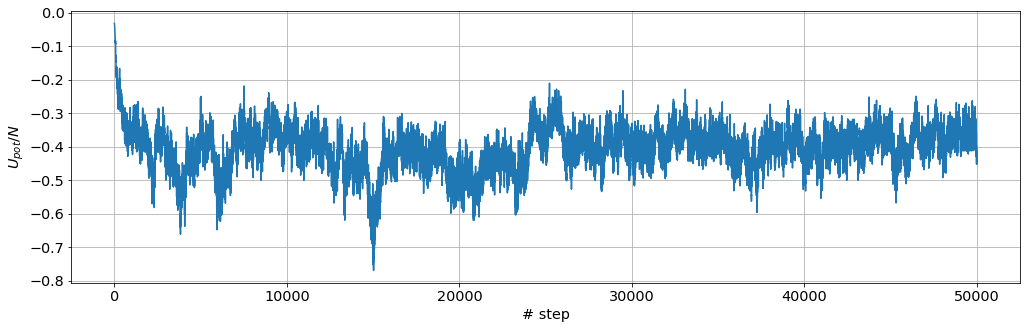

In [7]:
step, mediaGas = np.loadtxt("Gas/PreprintEqG.dat", usecols=(0,1), unpack='true')

plt.figure(figsize=(17,5))
plt.plot(step, mediaGas, label="Equilibrazione")
plt.xlabel('# step')
plt.ylabel(r'$U_{pot}/N$')
plt.grid(True)
plt.show()

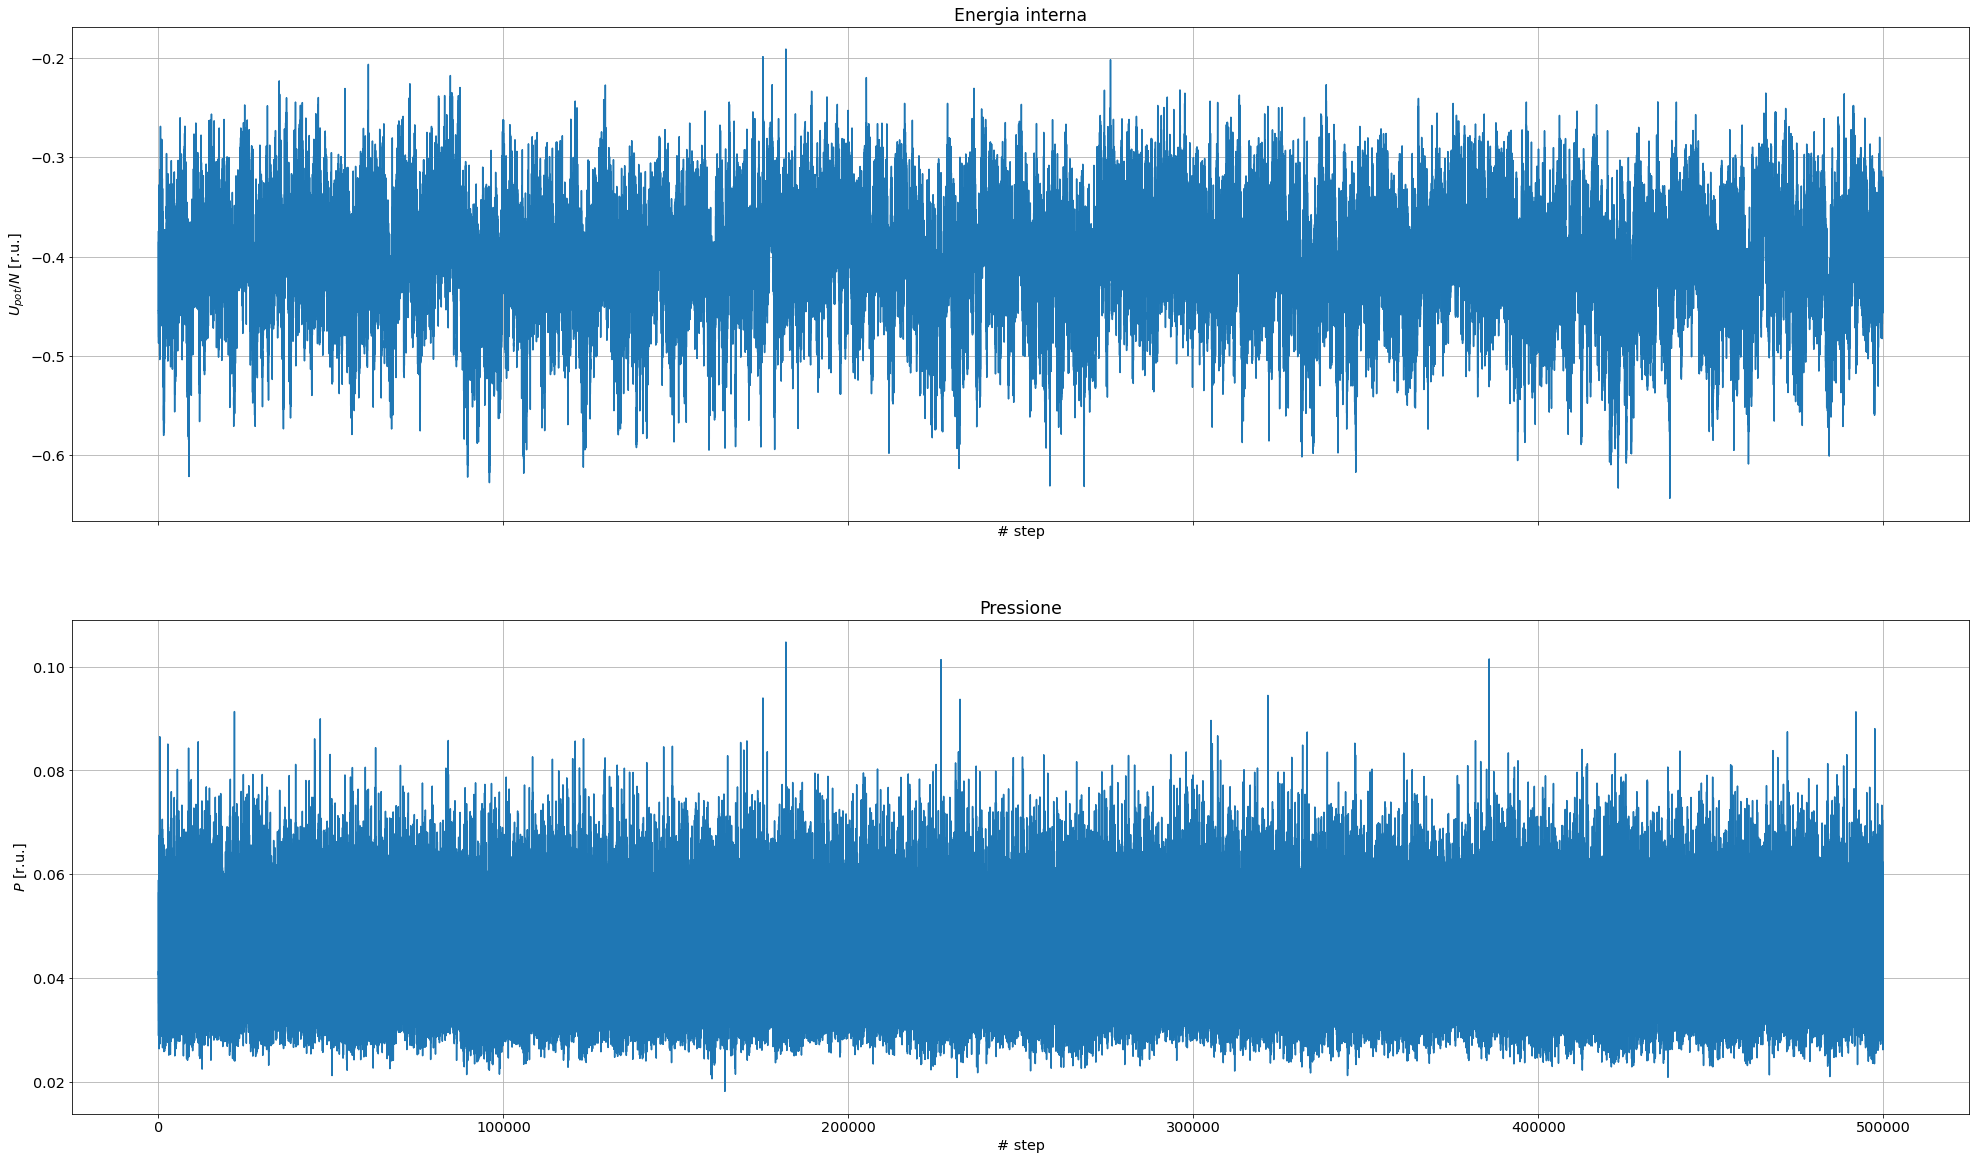

In [8]:
#Caricamento dati da file

step, UGas = np.loadtxt("Gas/UGas.dat", usecols=(0,1), unpack='true')
step, PGas = np.loadtxt("Gas/PGas.dat", usecols=(0,1), unpack='true')

#Preparazione plot

fig, axs = plt.subplots(2, 1, figsize=(34, 20), sharex=True, sharey=False,
                        tight_layout=False)

axs[0].plot(step, UGas)
axs[1].plot(step, PGas)

axs[0].set(xlabel=r'# step', ylabel=r'$U_{pot}/N$ [r.u.]', title='Energia interna')
axs[1].set(xlabel=r'# step', ylabel=r'$P$ [r.u.]', title='Pressione')

axs[0].grid(True)
axs[1].grid(True)
plt.show()

### Punto 2.2

Calcolare la funzione di autocorrelazione per energia potenziale per particella per stimare approssimativamente la dimensione corretta dei blocchi.
Calcolare e plottare la funzione di autocorrelazione.

La funzione di autocorrelazione è $$ \chi(t) = \frac{\langle U(t')U(t'+t)\rangle_{t'} - \langle U \rangle}{\sigma_U^2} $$

Quindi per una serie $U(t)$ di lunghezza $T$ sarà data da

$$ \chi(t) = \frac{\frac{1}{T-t}\sum_{t'=0}^{T-t}U(t')U(t'+t) - \frac{1}{(T-t)^2} \sum_{t'=0}^{T-t}U(t') \sum_{t'=0}^{T-t}U(t'+t) }{\frac{1}{T}\sum_{t'=0}^{T}U^2(t') - \left(\frac{1}{T}\sum_{t'=0}^{T}U(t')\right)^2} $$

### Punto 2.3

In [9]:
def autocorr(dati):
    chi = 0
    result = [1]
    T = len(dati)
    
    A = 0
    B = 0
    t = 0 #variabile della funzione correlazione

    #t'= s
    
    for s in range (T):
        A = A + dati[s]**2 #somma di u^2
        B = B + dati[s] #somma di u - da elevare al quadrto in un secondo momento
    
    while chi > (1/np.e**3): #a partire da 1/np.e**2 considero la correlazione trascurabile
        t = t + 1
        C = 1/(T-t)
        sum_1 = 0 #prima somma numeratore
        sum_2 = 0 #seconda somma numeratore
        sum_3 = 0 #terza somma numeratore
        for s in range (T-t):
            sum_1 = sum_1 + (dati[s]*dati[s+t])
            sum_2 = sum_2 + dati[s]
            sum_3 = sum_3 + dati[s+t]
        
        chi = ((C*sum_1) - C*C*sum_2*sum_3 )/((A/T) - (B/T)**2)
        result.append(chi)
    
    return result

In [10]:
def autocorr(data):
    chi = 1
    result = [1]
    T = len(data)
    
    A = 0
    B = 0
    t = 0 #variabile della funzione correlazione

    #t'= s
    
    for s in range (T):
        A = A + data[s]**2
        B = B + data[s]
            
    while chi > (1/np.e**3) :
        t = t + 1
        C = 1/(T-t)
        sum_1 = 0
        sum_2 = 0
        sum_3 = 0
        for s in range (T-t):
            sum_1 = sum_1 + data[s]
            sum_2 = sum_2 + data[s + t]
            sum_3 = sum_3 + (data[s + t] * data[s])
        
        chi = (C*sum_3 - C*sum_1*C*sum_2)/((A/T) - (B/T)**2)
        result.append(chi)
    
    return result

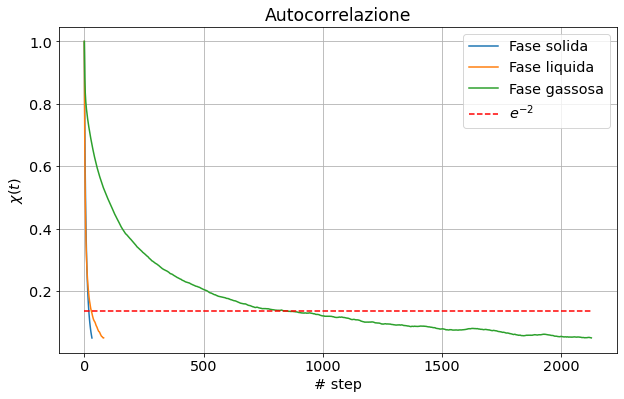

In [11]:
auto_solid = autocorr(USolid)
auto_liquid = autocorr(ULiquid)
auto_gas = autocorr(UGas)

plt.plot(auto_solid, label = "Fase solida")
plt.plot(auto_liquid, label = "Fase liquida")
plt.plot(auto_gas, label = "Fase gassosa")
plt.hlines(np.exp(-2),0,max(len(auto_gas),len(auto_liquid),len(auto_solid)),color="red",linestyle="dashed",label=r"$e^{-2}$")
plt.xlabel("# step")
plt.ylabel(r"$\chi(t)$")
plt.title("Autocorrelazione")
plt.legend();
plt.grid();

Dal grafico si osserva che l'autocorrelazione per lo stato gasso cala sotto la soglia $e^{-2}$ in circa un migliaio di step.

Per quanto riguarda gli stati liquido e solido invece dal grafico sembra siano sufficienti meno di un centinaio di passi. Plotto la funzione di autocorrelazione per liquido e solido per vedere più nel dettaglio quando questa scende sotto la soglia.

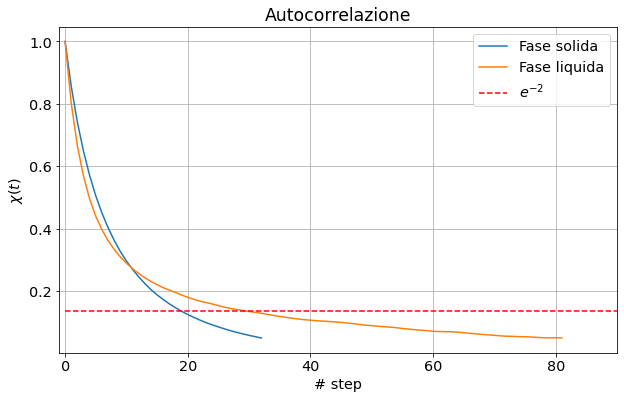

In [12]:
plt.plot(auto_solid, label = "Fase solida")
plt.plot(auto_liquid, label = "Fase liquida")
plt.hlines(np.exp(-2),0,max(len(auto_gas),len(auto_liquid),len(auto_solid)),color="red",linestyle="dashed",label=r"$e^{-2}$")
plt.xlabel("# step")
plt.xlim((-1,90))
plt.ylabel(r"$\chi(t)$")
plt.title("Autocorrelazione")
plt.legend();
plt.grid();

Dal grafico si osserva che per il liquido sembrano essere necessari una trentina di step mentre per il solido l'autocorrelazione scende sotto $e^{-2}$  in meno di 20 step.

**Nota:** dato che all'aumentare del numero di step nel blocco l'autoccorelazione diminuisce ulteriormente, nel caso del solido e dl liquido sono stati utilizzati blocchi con una lunlghezza di un centinaio di step.

### Punto 2.4

Utilizzare gli stessi dari per studiare l'incertezza statistica sul valor medio di $U/N$ in funzione della dimensione $L = \frac{M}{N}$ dei blocchi.
Studiare l'incertezza per $ L \in [10, 5000]$ e fare un grafico di queste incertezze come funzioni di $L$

In [15]:
def sigma(data, L):
    M = len(data)
    N = int(M/L)
    
    block = np.zeros(N) #creo il vettore di blocchi
    
    for i in range(N):
        
        somma = 0
        for j in range(L):
            somma = somma + data[L*i+j]
        block[i] = somma/L

    mean = 0
    mean2 = 0

    for j in range (N):
        mean += block[j]/N
        mean2 += block[j]**2/N

    sigma = np.sqrt((mean2 - mean**2)/(N-1))
    ave = mean
    
    return sigma

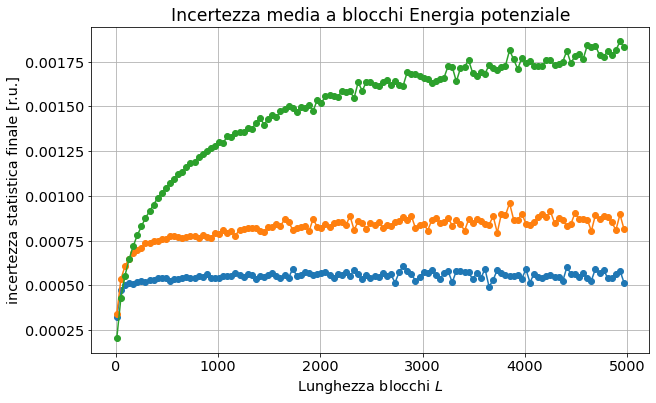

In [14]:
Ls = [40*r+10 for r in range(125)]
sigmaS = []
sigmaL = []
sigmaG = []
for L in Ls:
    valS = sigma(USolid, L)
    sigmaS.append(valS)
    valL = sigma(ULiquid, L)
    sigmaL.append(valL)
    valG = sigma(UGas, L)
    sigmaG.append(valG)
   
plt.plot(Ls, sigmaS, 'o-', label="Solido")
plt.plot(Ls, sigmaL, 'o-', label="Liquido")
plt.plot(Ls, sigmaG, 'o-', label="Gas")
plt.title("Incertezza media a blocchi Energia potenziale")
plt.xlabel("Lunghezza blocchi $L$")
plt.ylabel("incertezza statistica finale [r.u.]")
plt.grid();
plt.show()

Dal grafico si osserva che l'incertezza aumenta per dimensioni del blocco piccole ma tende ad un *pleateau* per dimensioni del blocco più grandi. Il calcolo dell'incertezza infatti non ha tenuto conto della correlazione tra i dati presente per piccoli blocchi.
Dato che l'autocorrelazione è positiva per blocchi piccoli otteniamo una sottostima dell'incertezza.

Superato un certo valore di soglia l'autocorrelazione diventa praticamente assente, così la stima dell'incertezza diventa più precisa e si assesta attorno ad un valore fisso.

## Punto 3

Inserire nel codice il calcolo della radial distribution function $g(r)$ come della distanza radiale tra particelle; nel codice utilizzare $r \in [0; \frac{L}{2}]$.

La radial distribution function, (o pair correlation function) $g(r)$ descrive la probabilità di trovare una particella ad una distanza $r$ dalla particella presa come riferimento, rispetto a quella che si avrebbe nel caso di un gas ideale della medesima densità.

La funzione di distribuzione radiale, tenendo conto delle code di potenziale esterne al raggio di cut-off, permette di stimare le correzioni da applicare ai valori calcolati di pressione ed energia potenziale.

Se $r_c$ è il raggio di cut-off, la correzione all'energia potenziale per particella è
$$ \frac{\langle V \rangle_{tail}}{N}=2\pi\rho N\int_0^{\infty} r^2V(r)g(r)dr
$$

Siccome le code si riferiscono a grandi distanze la distribuzione radiale tende a quella del gas perfetto quando $g(r)\approx 1$, perciò la correzione diventa 
$$\frac{\langle V \rangle_{tail}}{N}\approx\pi\rho N\int_{r_c}^{\infty} r^2V(r)dr = \frac{8\pi\epsilon\rho}{3r_c^3}\big(\frac{1}{3r_c^6} - 1\big) $$

Per la pressione la correzione si trova applicando il teorema del viriale
$$ \frac{\langle w \rangle_{tail}}{3N\epsilon} \approx \frac{2}{3} \pi\rho \int_{r_c}^{\infty} r^2 48 \big[\big(\frac{\sigma}{r}\big)^{12} -\frac{1}{2}\big(\frac{\sigma}{r}\big)^{6} \big]dr = 32\pi\rho\big[\frac{1}{9r_c^9}-\frac{1}{6r_c^3}\big]$$

**Descrizione algoritmo**:
* considero una particella che si trova al centro del box
* ciclo su ciascuna coppia di particelle
* valuto la distnza tra particelle
* aggiungo +2 al bin dell'istogramma che include la distanza $dr$ misurata tra le particelle

Dato che questo procedimento viene ripetuto per ogni step in ciascun blocco l'*istogramma* è stato normalizzato per il numero di step contenuto all'interno dei blocchi.

#### Plot risultati

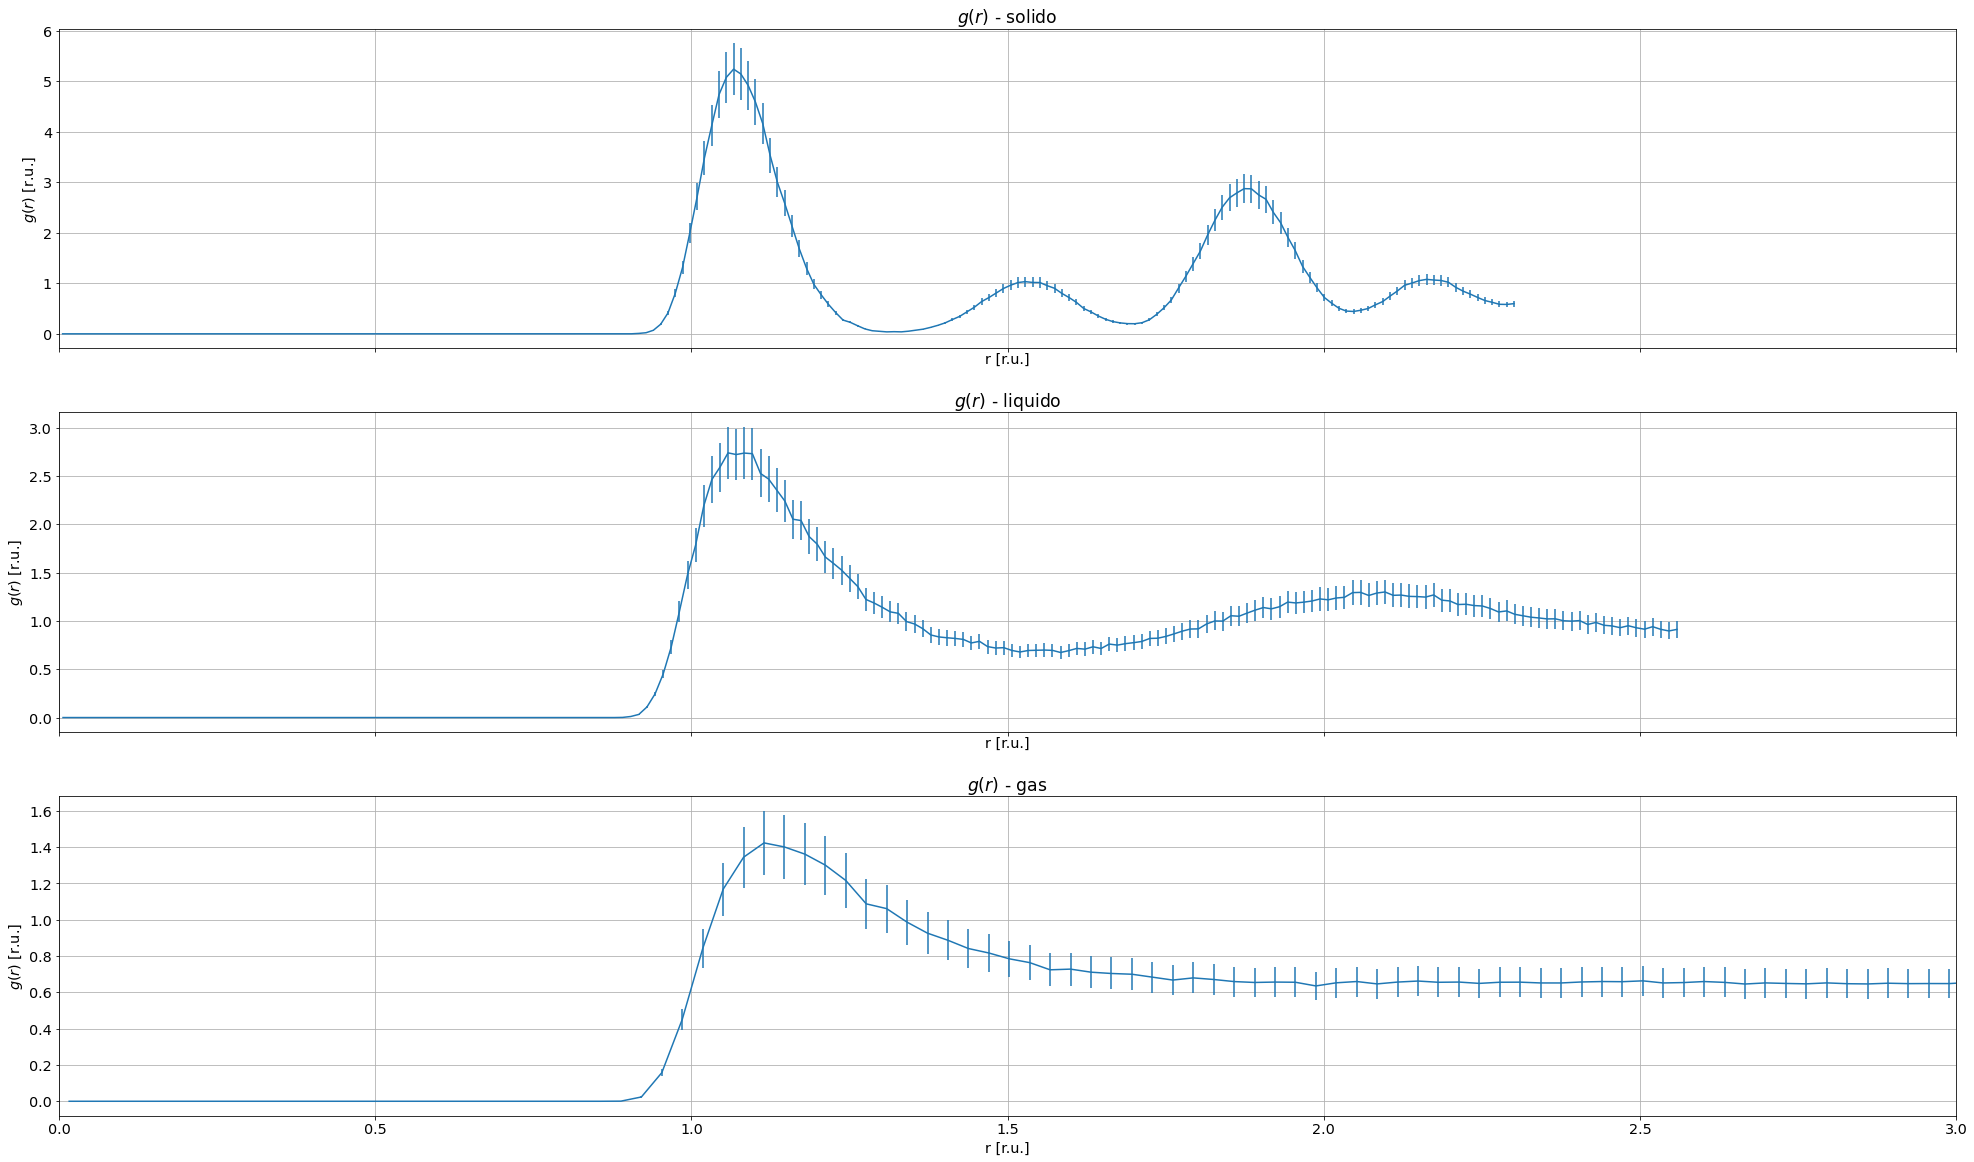

In [16]:
#Caricamento dati da file
r_sol, g_Solid, errSolid = np.loadtxt("Solido/GSolid.dat", usecols=(0,1,2), unpack='true')
r_liq, g_Liquid, errLiquid = np.loadtxt("Liquido/GLiquid.dat", usecols=(0,1,2), unpack='true')
r_gas, g_Gas, errGas = np.loadtxt("Gas/GGas.dat", usecols=(0,1,2), unpack='true')

#Preparazione plot
fig, axs = plt.subplots(3, 1, figsize=(34, 20), sharex=True, sharey=False,
                        tight_layout=False)

axs[0].errorbar(r_sol, g_Solid, yerr = errSolid)
axs[1].errorbar(r_liq, g_Liquid, yerr = errLiquid)
axs[2].errorbar(r_gas, g_Gas, yerr = errGas)

axs[0].set(xlabel=r'r [r.u.]', xlim = (0,3), ylabel=r'$g(r)$ [r.u.]', title=r'$g(r)$ - solido')
axs[1].set(xlabel=r'r [r.u.]', xlim = (0,3), ylabel=r'$g(r)$ [r.u.]', title=r'$g(r)$ - liquido')
axs[2].set(xlabel=r'r [r.u.]', ylabel=r'$g(r)$ [r.u.]', title=r'$g(r)$ - gas')

axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)

plt.show()

## Punto 4

Equilibrare e simulare il comportamento dell'Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) nelle seguenti condizioni:
1. stato solido: $\rho^* = 1.1, T^* = 0.8$ con raggio di cut-off $r_{cut} = 2.2$
2. stato liquido: $\rho^* = 0.8, T^* = 1.1$ con raggio di cut-off $r_{cut} = 2.5$
3. stato gas: $\rho^* = 0.05, T^* = 1.2$ con raggio di cut-off $r_{cut} = 5.0$

Di seguito sono riportati i grafici dell'energia potenziale per particella e la pressione del gas ottenuti con l'algoritmo di Metropolis e con l'algoritmo di Dinamica Molecolare.

È riportato anche il confronto tra i valori ottenuti per la distribuzione radiale $g(r)$.

### Solido

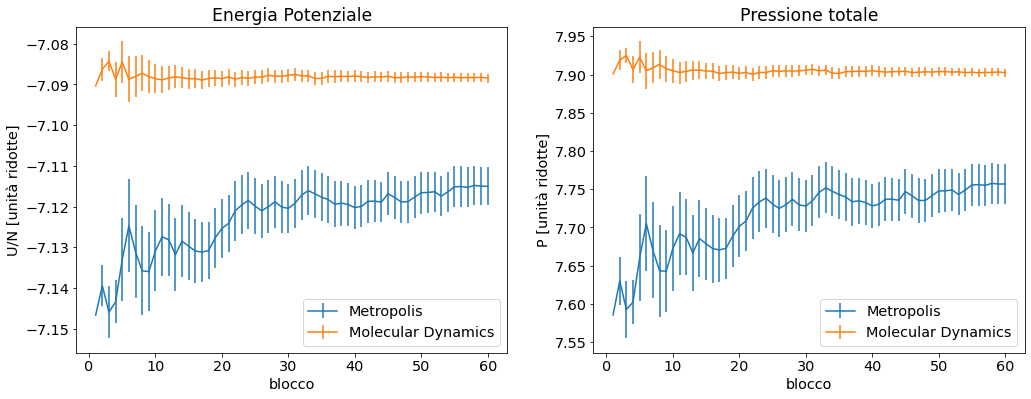

In [17]:
iblk, USolMC, err_epot = np.loadtxt("Solido/Confronto/USolidMC.dat", usecols=(0,2,3), unpack='true')
iblk, PSolMC, err_ptot = np.loadtxt("Solido/Confronto/PSolidMC.dat", usecols=(0,2,3), unpack='true')
iblk, USolMD, err_epotMD = np.loadtxt("Solido/Confronto/USolidMD.dat", usecols=(0,2,3), unpack='true')
iblk, PSolMD, err_ptotMD = np.loadtxt("Solido/Confronto/PSolidMD.dat", usecols=(0,2,3), unpack='true')

fig, plts = plt.subplots(1,2)
fig.set_figwidth(17)

plts[0].errorbar(iblk, USolMC, yerr = err_epot, label = 'Metropolis')
plts[0].errorbar(iblk, USolMD, yerr = err_epotMD, label = 'Molecular Dynamics')
plts[0].set_title('Energia Potenziale')
plts[0].set_ylabel("U/N [unità ridotte]")
plts[0].set_xlabel("blocco")
plts[0].legend()


plts[1].errorbar(iblk, PSolMC, yerr = err_ptot, label = 'Metropolis')
plts[1].errorbar(iblk, PSolMD, yerr = err_ptotMD, label = 'Molecular Dynamics')
plts[1].set_title('Pressione totale')
plts[1].set_ylabel("P [unità ridotte]")
plts[1].set_xlabel("blocco")
plts[1].legend()

### Liquido

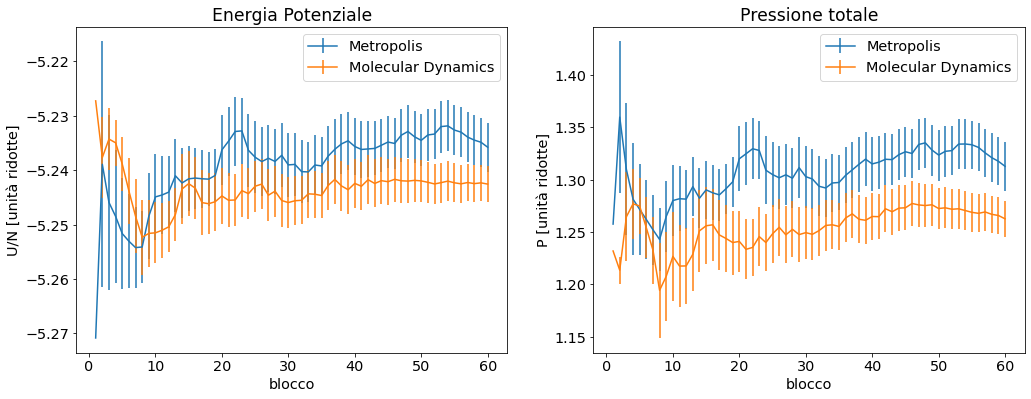

In [18]:
iblk, ULiqMC, err_epot = np.loadtxt("Liquido/Confronto/ULiquidMC.dat", usecols=(0,2,3), unpack='true')
iblk, PLiqMC, err_ptot = np.loadtxt("Liquido/Confronto/PLiquidMC.dat", usecols=(0,2,3), unpack='true')
iblk, ULiqMD, err_epotMD = np.loadtxt("Liquido/Confronto/ULiquidMD.dat", usecols=(0,2,3), unpack='true')
iblk, PLiqMD, err_ptotMD = np.loadtxt("Liquido/Confronto/PLiquidMD.dat", usecols=(0,2,3), unpack='true')

fig, plts = plt.subplots(1,2)
fig.set_figwidth(17)

plts[0].errorbar(iblk, ULiqMC, yerr = err_epot, label = 'Metropolis')
plts[0].errorbar(iblk, ULiqMD, yerr = err_epotMD, label = 'Molecular Dynamics')
plts[0].set_title('Energia Potenziale')
plts[0].set_ylabel("U/N [unità ridotte]")
plts[0].set_xlabel("blocco")
plts[0].legend()


plts[1].errorbar(iblk, PLiqMC, yerr = err_ptot, label = 'Metropolis')
plts[1].errorbar(iblk, PLiqMD, yerr = err_ptotMD, label = 'Molecular Dynamics')
plts[1].set_title('Pressione totale')
plts[1].set_ylabel("P [unità ridotte]")
plts[1].set_xlabel("blocco")
plts[1].legend()

### Gas

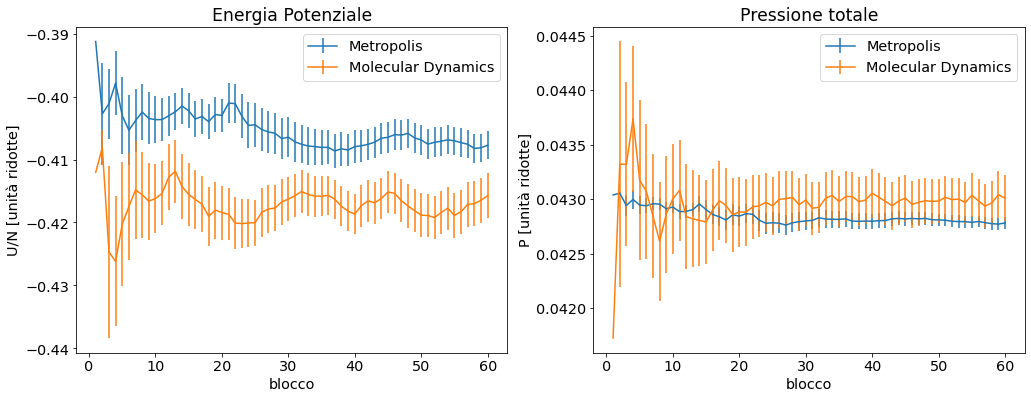

In [19]:
iblk, UGasMC, err_epot = np.loadtxt("Gas/Confronto/UGasMC.dat", usecols=(0,2,3), unpack='true')
iblk, PGasMC, err_ptot = np.loadtxt("Gas/Confronto/PGasMC.dat", usecols=(0,2,3), unpack='true')
iblk, UGasMD, err_epotMD = np.loadtxt("Gas/Confronto/UGasMD.dat", usecols=(0,2,3), unpack='true')
iblk, PGasMD, err_ptotMD = np.loadtxt("Gas/Confronto/PGasMD.dat", usecols=(0,2,3), unpack='true')

fig, plts = plt.subplots(1,2)
fig.set_figwidth(17)

plts[0].errorbar(iblk, UGasMC, yerr = err_epot, label = 'Metropolis')
plts[0].errorbar(iblk, UGasMD, yerr = err_epotMD, label = 'Molecular Dynamics')
plts[0].set_title('Energia Potenziale')
plts[0].set_ylabel("U/N [unità ridotte]")
plts[0].set_xlabel("blocco")
plts[0].legend()


plts[1].errorbar(iblk, PGasMC, yerr = err_ptot, label = 'Metropolis')
plts[1].errorbar(iblk, PGasMD, yerr = err_ptotMD, label = 'Molecular Dynamics')
plts[1].set_title('Pressione totale')
plts[1].set_ylabel("P [unità ridotte]")
plts[1].set_xlabel("blocco")
plts[1].legend()

Mostrare i valori medi, con relative incertezze, per l'energia potenziale per particella $U/N$, la pressione $P$, la funzione di distribuzione radiale $g(r)$ nelle unità dell'SI.
Confrontare i risultati attesi per $g(r)$ ottenuti utilizzando il codice di dinamica molecolare e la simulazione Monte Carlo.

### Confronto $g(r)$

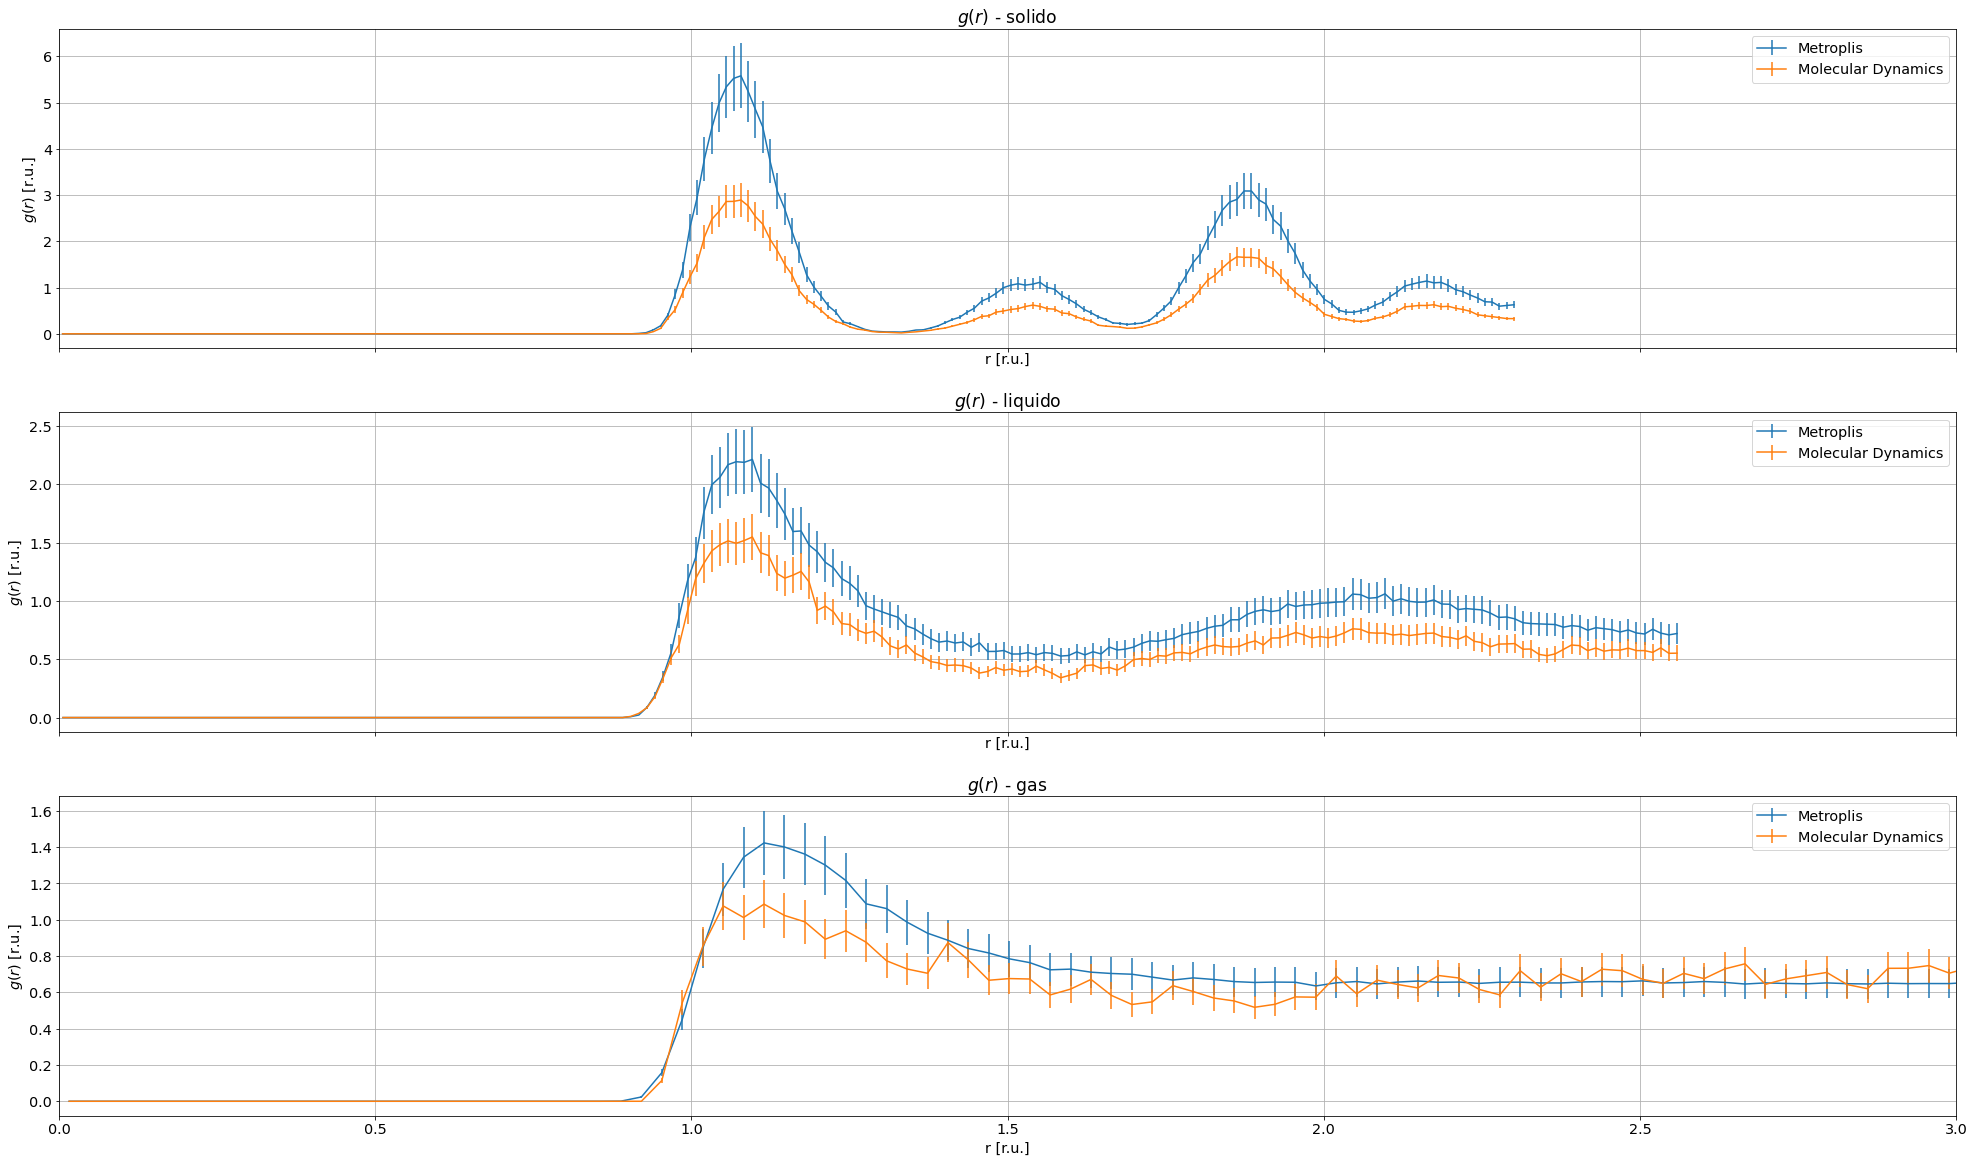

In [20]:
#dati Metroplis
r_sol, g_SolidM, errSolidM = np.loadtxt("Solido/Confronto/GSolMC.dat", usecols=(0,1,2), unpack='true')
r_liq, g_LiquidM, errLiquidM = np.loadtxt("Liquido/Confronto/GLiqMC.dat", usecols=(0,1,2), unpack='true')
r_gas, g_GasM, errGasM = np.loadtxt("Gas/Confronto/GGasMC.dat", usecols=(0,1,2), unpack='true')

#dati dinamica molecolare
r_sol, g_SolidD, errSolidD = np.loadtxt("Solido/Confronto/GSolMD.dat", usecols=(0,1,2), unpack='true')
r_liq, g_LiquidD, errLiquidD = np.loadtxt("Liquido/Confronto/GLiqMD.dat", usecols=(0,1,2), unpack='true')
r_gas, g_GasD, errGasD = np.loadtxt("Gas/Confronto/GGasMD.dat", usecols=(0,1,2), unpack='true')


#Preparazione plot

fig, axs = plt.subplots(3, 1, figsize=(34, 20), sharex=True, sharey=False,
                        tight_layout=False)

axs[0].errorbar(r_sol, g_SolidM, yerr = errSolidM)
axs[1].errorbar(r_liq, g_LiquidM, yerr = errLiquidM)
axs[2].errorbar(r_gas, g_GasM, yerr = errGasM)

axs[0].errorbar(r_sol, g_SolidD, yerr = errSolidD)
axs[1].errorbar(r_liq, g_LiquidD, yerr = errLiquidD)
axs[2].errorbar(r_gas, g_GasD, yerr = errGasD)

axs[0].set(xlabel=r'r [r.u.]', xlim=(0,3), ylabel=r'$g(r)$ [r.u.]', title=r'$g(r)$ - solido')
axs[1].set(xlabel=r'r [r.u.]', xlim=(0,3), ylabel=r'$g(r)$ [r.u.]', title=r'$g(r)$ - liquido')
axs[2].set(xlabel=r'r [r.u.]', xlim=(0,3), ylabel=r'$g(r)$ [r.u.]', title=r'$g(r)$ - gas')

axs[0].legend(['Metroplis', 'Molecular Dynamics'], loc='best')
axs[1].legend(['Metroplis', 'Molecular Dynamics'], loc='best')
axs[2].legend(['Metroplis', 'Molecular Dynamics'], loc='best')

axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)

plt.show()

Fatta eccezione per il caso del solido, dai grafici della pressione e dell'energia potenziale si osserva una buona compatibilità tra i risultati ottenuti con i due diversi modelli. La complessiva compatibilità dei risultati per la pressione e per l'energia si riflette naturalmente sulla funzione di distribuzione radiale $g(r)$ per le diverse fasi ottenuta con la *dinamica molecolare* e con la *meccanica statistica*.
SI può in questo modo avere contezza dell'efficacia predittiva della meccanica statistica.